In [1]:
import pandas as pd

In [2]:
attr_df = pd.read_parquet('/scratch/data/m23csa016/meesho_data/category_attributes.parquet')
attr_df

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [3]:
attr_df

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [176]:
for i in range(5):
    print(attr_df['Attribute_list'][i])

['color' 'neck' 'pattern' 'print_or_pattern_type' 'sleeve_length']
['blouse_pattern' 'border' 'border_width' 'color' 'occasion'
 'ornamentation' 'pallu_details' 'pattern' 'print_or_pattern_type'
 'transparency']
['color' 'fit_shape' 'length' 'occasion' 'ornamentation' 'pattern'
 'print_or_pattern_type' 'sleeve_length' 'sleeve_styling']
['color' 'fit_shape' 'length' 'pattern' 'print_or_pattern_type'
 'sleeve_length' 'sleeve_styling' 'surface_styling']
['color' 'fit_shape' 'length' 'neck_collar' 'ocassion' 'pattern'
 'print_or_pattern_type' 'sleeve_length' 'sleeve_styling'
 'surface_styling']


In [ ]:
universal_cate_attr = {
 'Men Tshirts': {'color': 'attr_1', 'pattern': 'attr_3', 'print_or_pattern_type': 'attr_4'},
 'Sarees': {'color': 'attr_4', 'pattern': 'attr_8', 'print_or_pattern_type': 'attr_9'},
 'Kurtis': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'},
 'Women Tshirts': {'color': 'attr_1', 'pattern': 'attr_4', 'print_or_pattern_type': 'attr_5'},
 'Women Tops & Tunics': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'}
}


In [183]:
str(1123).zfill(6) + '.jpg'

'001123.jpg'

In [181]:
# Category to attribute mapping for color, pattern, and print_or_pattern_type
category_attribute_mapping = {
    'Men Tshirts': {'color': 'attr_1', 'pattern': 'attr_3', 'print_or_pattern_type': 'attr_4'},
    'Sarees': {'color': 'attr_4', 'pattern': 'attr_8', 'print_or_pattern_type': 'attr_9'},
    'Kurtis': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'},
    'Women Tshirts': {'color': 'attr_1', 'pattern': 'attr_4', 'print_or_pattern_type': 'attr_5'},
    'Women Tops & Tunics': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'}
}

# Function to get attribute value based on category and attribute type
def get_attribute_value(row, attribute_type):
    category = row['Category']
    attribute_column = category_attribute_mapping[category][attribute_type]
    return row[attribute_column]


finaldf = pd.read_csv("final_10k.csv")
# Creating the new dataframe with required columns
new_df = pd.DataFrame()
new_df['id'] = finaldf['id']
new_df['Category'] = finaldf['Category']
new_df['color'] = finaldf.apply(lambda row: get_attribute_value(row, 'color'), axis=1)
new_df['pattern'] = finaldf.apply(lambda row: get_attribute_value(row, 'pattern'), axis=1)
new_df['print_or_pattern_type'] = finaldf.apply(lambda row: get_attribute_value(row, 'print_or_pattern_type'), axis=1)

# Display the new dataframe
new_df.to_csv("universal_attrs_10k.csv", index=False)

In [11]:
import pandas as pd

def create_group_specific_dataframe(input_file, output_file, group_specific_attr):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Filter the dataframe to include only categories in group_specific_attr
    filtered_df = df[df['Category'].isin(group_specific_attr.keys())]

    # Create the new dataframe with required columns
    new_df = pd.DataFrame()
    new_df['id'] = filtered_df['id']
    new_df['Category'] = filtered_df['Category']

    # Add group-specific attributes
    for attr in ['fit_shape', 'length', 'sleeve_length', 'sleeve_styling']:
        new_df[attr] = filtered_df.apply(
            lambda row: row[group_specific_attr[row['Category']][attr]], 
            axis=1
        )

    # Export the new dataframe to CSV
    new_df.to_csv(output_file, index=False)
    print(f"New dataframe with correct group-specific attributes exported to {output_file}")

    return new_df

# Define the group-specific attributes
group_specific_attr = {
    'Kurtis': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Women Tshirts': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7'
    },
    'Women Tops & Tunics': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    }
}

# Example usage
input_file = "final_10k.csv"
output_file = "correct_group_specific_attrs.csv"
new_df = create_group_specific_dataframe(input_file, output_file, group_specific_attr)

# Display the first few rows of the new dataframe
print(new_df.head())

# Display information about the new dataframe
print(new_df.info())

# Display value counts for the Category column
print(new_df['Category'].value_counts())

# Display a sample of each category
for category in group_specific_attr.keys():
    print(f"\nSample of {category}:")
    print(new_df[new_df['Category'] == category].head(2))

New dataframe with correct group-specific attributes exported to correct_group_specific_attrs.csv
      id Category fit_shape       length          sleeve_length sleeve_styling
0  25994   Kurtis    a-line  calf length  three-quarter sleeves        regular
1  26388   Kurtis  straight  knee length  three-quarter sleeves        regular
2  26440   Kurtis    a-line  calf length  three-quarter sleeves        regular
3  27277   Kurtis    a-line  calf length  three-quarter sleeves        regular
4  27323   Kurtis    a-line  knee length  three-quarter sleeves        regular
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 11565
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7043 non-null   int64 
 1   Category        7043 non-null   object
 2   fit_shape       7043 non-null   object
 3   length          7043 non-null   object
 4   sleeve_length   7043 non-null   object
 5   sleeve_stylin

In [ ]:
cs_men_tshirts = { 'Men Tshirts': { 'neck': 'attr_2', 'sleeve_length': 'attr_5' }}
cs_sarees  = {'Sarees': { 'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 'transparency': 'attr_10' }},
cs_kurtis = {'Kurtis': { 'occassion': 'attr_4', 'ornamentation': 'attr_5' }}
cs_women_tops =  {'Women Tops & Tunics': { 'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10' }}
cs_women_tshirts =  {'Women Tshirts': { 'surface_styling': 'attr_8' } }

In [ ]:
cs_men_tshirts = { 'Men Tshirts': { 'neck': 'attr_2', 'sleeve_length': 'attr_5' }}
cs_sarees  = {'Sarees': { 'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 'transparency': 'attr_10' }},
cs_kurtis = {'Kurtis': { 'occassion': 'attr_4', 'ornamentation': 'attr_5' }}
cs_women_tops =  {'Women Tops & Tunics': { 'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10' }}
cs_women_tshirts =  {'Women Tshirts': { 'surface_styling': 'attr_8' } }

# Example usage
input_file = "final_10k.csv"
output_file = "correct_group_specific_attrs.csv"
new_df = create_group_specific_dataframe(input_file, output_file, group_specific_attr)


In [12]:
import pandas as pd

def create_category_specific_dataframe(input_file, output_file, category_attr):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Get the category (assuming there's only one key in the dictionary)
    category = list(category_attr.keys())[0]

    # Filter the dataframe to include only the specific category
    filtered_df = df[df['Category'] == category]

    # Create the new dataframe with required columns
    new_df = pd.DataFrame()
    new_df['id'] = filtered_df['id']
    new_df['Category'] = filtered_df['Category']

    # Add category-specific attributes
    for attr, column in category_attr[category].items():
        new_df[attr] = filtered_df[column]

    # Export the new dataframe to CSV
    new_df.to_csv(output_file, index=False)
    print(f"New dataframe for {category} exported to {output_file}")

    return new_df

# Define the category-specific attributes
cs_men_tshirts = {'Men Tshirts': {'neck': 'attr_2', 'sleeve_length': 'attr_5'}}
cs_sarees = {'Sarees': {'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 
                        'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 
                        'transparency': 'attr_10'}}
cs_kurtis = {'Kurtis': {'occassion': 'attr_4', 'ornamentation': 'attr_5'}}
cs_women_tops = {'Women Tops & Tunics': {'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10'}}
cs_women_tshirts = {'Women Tshirts': {'surface_styling': 'attr_8'}}

# List of all category-specific dictionaries and their corresponding output files
categories = [
    (cs_men_tshirts, "cs_men_tshirts_10k.csv"),
    (cs_sarees, "cs_sarees_10k.csv"),
    (cs_kurtis, "cs_kurtis_10k.csv"),
    (cs_women_tops, "cs_women_tops_10k.csv"),
    (cs_women_tshirts, "cs_women_tshirts_10k.csv")
]

# Input file
input_file = "final_10k.csv"

# Process each category and create corresponding CSV files
for category_attr, output_file in categories:
    new_df = create_category_specific_dataframe(input_file, output_file, category_attr)

New dataframe for Men Tshirts exported to cs_men_tshirts_10k.csv
New dataframe for Sarees exported to cs_sarees_10k.csv
New dataframe for Kurtis exported to cs_kurtis_10k.csv
New dataframe for Women Tops & Tunics exported to cs_women_tops_10k.csv
New dataframe for Women Tshirts exported to cs_women_tshirts_10k.csv


In [4]:
# Read the Parquet file
df = pd.read_csv('/scratch/data/m23csa016/meesho_data/train.csv')

In [26]:
# Optional: Create a heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
def analyze_value_specific_nulls(df, columns):
    results = {}
    
    for focus_attr in columns:
        unique_values = df[focus_attr].dropna().unique()
        
        for value in unique_values:
            # Filter rows where the focus attribute has this specific value
            value_present = df[df[focus_attr] == value]
            
            # Count nulls in other attributes when this value is present
            other_attrs = [col for col in columns if col != focus_attr]
            null_counts = value_present[other_attrs].isnull().sum()
            
            # Calculate percentages
            percentages = (null_counts / len(value_present) * 100).round(2)
            
            # Only keep attributes with 100% null
            fully_null_attrs = percentages[percentages == 100]
            
            if not fully_null_attrs.empty:
                results[f"{focus_attr}_{value}"] = fully_null_attrs.to_dict()
    
    return results


In [ ]:
men_tshirt_df = df[df['Category'] == "Men Tshirts"]

# List of columns to analyze with generic names
men_tshirt_cols = [
    'attr_1',  # corresponds to 'color'
    'attr_2',  # corresponds to 'neck'
    'attr_3',  # corresponds to 'pattern'
    'attr_4',  # corresponds to 'print_or_pattern_type'
    'attr_5'   # corresponds to 'sleeve_length'
]

# Perform the analysis
men_tshirt_analysis = analyze_value_specific_nulls(men_tshirt_df, men_tshirt_cols)

# Print the results
for value, null_attrs in men_tshirt_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

# Get unique rows
men_tshirt_unique_rows = men_tshirt_df.drop(columns=['id'])
men_tshirt_unique_rows = men_tshirt_unique_rows.drop_duplicates()

men_tshirt_no_null = men_tshirt_unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5'])

print(len(men_tshirt_no_null))
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']:
    print(f"\nRatios for {col}:")
    print(men_tshirt_no_null[col].value_counts(dropna=False))  # normalize=True gives the ratio

In [122]:
import pandas as pd
import numpy as np

men_tshirt_df = df[df['Category'] == "Men Tshirts"]
men_tshirt_df = men_tshirt_df.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5'])
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
men_tshirt_df['group'] = men_tshirt_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = men_tshirt_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 2000 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = men_tshirt_df[men_tshirt_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("men_tshirt_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 37

Ratios for attr_1:
attr_1
default       738
multicolor    639
white         414
black         209
Name: count, dtype: int64

Ratios for attr_2:
attr_2
polo     1252
round     748
Name: count, dtype: int64

Ratios for attr_3:
attr_3
solid      1272
printed     728
Name: count, dtype: int64

Ratios for attr_4:
attr_4
solid         1276
default        490
typography     234
Name: count, dtype: int64

Ratios for attr_5:
attr_5
short sleeves    1960
long sleeves       40
Name: count, dtype: int64


In [115]:
sampled_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,1241,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
1,2288,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
2,694,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
3,1578,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
4,2557,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,172,Men Tshirts,5,multicolor,round,printed,typography,long sleeves,NaN,NaN,NaN,NaN,NaN
996,2013,Men Tshirts,5,default,polo,solid,default,short sleeves,NaN,NaN,NaN,NaN,NaN
997,1278,Men Tshirts,5,white,polo,printed,default,short sleeves,NaN,NaN,NaN,NaN,NaN
998,2622,Men Tshirts,5,default,polo,printed,solid,short sleeves,NaN,NaN,NaN,NaN,NaN


In [95]:
# List of columns to analyze with generic names

women_tshirts_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8'
]

women_tshirts = df[df['Category'] == "Women Tshirts"]

# Perform the analysis
women_tshirt_analysis = analyze_value_specific_nulls(women_tshirts, women_tshirts_cols)

# Print the results
for value, null_attrs in women_tshirt_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")


When 'attr_3_long' is present:
  'attr_8' is always null (100% of cases)

When 'attr_4_default' is present:
  'attr_8' is always null (100% of cases)

When 'attr_7_cuffed sleeves' is present:
  'attr_8' is always null (100% of cases)


In [154]:
# Filter rows for Category 'Women Tshirts'
women_tshirts = df[df['Category'] == "Women Tshirts"]
# Drop duplicates based on all columns except 'id'
unique_rows = women_tshirts.drop_duplicates(subset=women_tshirts.columns.difference(['id']))

# unique_rows = unique_rows.drop_duplicates()

filtered_df = unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(filtered_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         125
default       121
white         118
yellow        111
pink           81
maroon         76
multicolor     70
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    433
loose      159
boxy       110
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    283
crop       276
long       143
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    534
solid       92
default     76
Name: count, dtype: int64

Ratios for attr_5:
attr_5
default        132
typography     127
funky print    123
graphic        109
quirky         106
solid          105
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    361
long sleeves     229
default          112
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    583
cuffed sleeves     119
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     700
applique      2
Name: count, dtype: int64


/tmp/ipykernel_1691957/2624077022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')


In [152]:
filtered_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
32435,32601,Women Tshirts,8,multicolor,loose,long,default,default,default,regular sleeves,default,NaN,NaN
32436,32602,Women Tshirts,8,yellow,loose,long,default,default,long sleeves,regular sleeves,default,NaN,NaN
32438,32604,Women Tshirts,8,multicolor,loose,long,default,default,long sleeves,regular sleeves,default,NaN,NaN
32447,32613,Women Tshirts,8,default,boxy,long,default,graphic,default,regular sleeves,default,NaN,NaN
32449,32615,Women Tshirts,8,yellow,boxy,crop,printed,funky print,long sleeves,cuffed sleeves,default,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46063,46229,Women Tshirts,8,white,regular,regular,printed,typography,short sleeves,regular sleeves,applique,NaN,NaN
47245,47411,Women Tshirts,8,white,regular,crop,printed,solid,short sleeves,regular sleeves,default,NaN,NaN
48133,48299,Women Tshirts,8,white,regular,crop,printed,typography,short sleeves,regular sleeves,applique,NaN,NaN
48654,48820,Women Tshirts,8,white,regular,crop,printed,typography,short sleeves,regular sleeves,default,NaN,NaN


In [155]:
import pandas as pd
import numpy as np

women_tshirt = df[df['Category'] == "Women Tshirts"]

women_tshirts_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8'
]

women_tshirt = women_tshirt.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
women_tshirt['attr_8'] = women_tshirt['attr_8'].where(women_tshirt['attr_8'].notna(), 'default')

women_tshirt = women_tshirt.dropna(subset=women_tshirts_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
women_tshirt['group'] = women_tshirt.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = women_tshirt['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 1300).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 1300 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = women_tshirt[women_tshirt['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

sampled_df = pd.concat([sampled_df, filtered_df], axis=0)

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("women_tshirt_2000.csv", index=False)

Number of samples: 1300
Number of unique samples: 275

Ratios for attr_1:
attr_1
white         490
default       395
black         376
yellow        254
pink          182
multicolor    179
maroon        126
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    1539
loose       281
boxy        182
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    973
crop       743
long       286
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    1708
default     160
solid       134
Name: count, dtype: int64

Ratios for attr_5:
attr_5
typography     566
funky print    439
default        316
graphic        267
quirky         265
solid          149
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    1531
long sleeves      321
default           150
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    1828
cuffed sleeves      174
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     2000
applique       2
Name: count, dtype:

In [70]:
unique_rows.isna().sum()

Category       0
len            0
attr_1       357
attr_2       826
attr_3       337
attr_4       614
attr_5       314
attr_6       602
attr_7       829
attr_8      2102
attr_9      2251
attr_10     2251
dtype: int64

In [79]:
filtered_df = unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')

/tmp/ipykernel_1691957/25260082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')


In [88]:
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']:
    print(f"\nRatios for {col}:")
    print(filtered_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         125
default       121
white         118
yellow        111
pink           81
maroon         76
multicolor     70
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    433
loose      159
boxy       110
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    283
crop       276
long       143
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    534
solid       92
default     76
Name: count, dtype: int64

Ratios for attr_5:
attr_5
default        132
typography     127
funky print    123
graphic        109
quirky         106
solid          105
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    361
long sleeves     229
default          112
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    583
cuffed sleeves     119
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     700
applique      2
Name: count, dtype: int64

Ratios for attr_9:
attr_9
NaN    702
Name: count, dtype: in

In [41]:
sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sarees_df = df[df['Category'] == "Sarees"]

# Perform the analysis
sarees_analysis = analyze_value_specific_nulls(sarees_df, sarees_cols)

# Print the results
for value, null_attrs in sarees_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

In [133]:
import pandas as pd
import numpy as np

sarees_df = df[df['Category'] == "Sarees"]

sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sarees_df = sarees_df.dropna(subset=sarees_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
sarees_df['group'] = sarees_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = sarees_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = sarees_df[sarees_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    # sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("sarees_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 441

Ratios for attr_1:
attr_1
same as saree     1463
same as border     346
default            126
solid               65
Name: count, dtype: int64

Ratios for attr_2:
attr_2
zari             1181
woven design      475
temple border     182
default            95
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
small border    1425
big border       544
no border         31
Name: count, dtype: int64

Ratios for attr_4:
attr_4
cream         651
multicolor    590
default       325
white         229
green          59
navy blue      55
yellow         48
pink           43
Name: count, dtype: int64

Ratios for attr_5:
attr_5
party          1405
traditional     389
daily           186
wedding          20
Name: count, dtype: int64

Ratios for attr_6:
attr_6
jacquard               1558
default                 229
tassels and latkans     213
Name: count, dtype: int64

Ratios for attr_7:
attr_7
woven 

In [7]:
def sample_and_export(df, columns, sample_size, output_file):
    # Drop rows with NaN values in specified columns
    # df_clean = df.dropna(subset=columns)
    df_clean = df.copy()
    
    # Create a column that identifies unique rows
    df_clean['group'] = df_clean[columns].apply(tuple, axis=1)
    
    # Get the proportion of each unique row
    group_proportions = df_clean['group'].value_counts(normalize=True)
    
    # Calculate how many samples we want from each group
    samples_per_group = (group_proportions * sample_size).round().astype(int)
    
    # Ensure we get exactly the desired sample size by adjusting the largest group
    samples_per_group.iloc[0] += sample_size - samples_per_group.sum()
    
    # Create an empty dataframe to store our sampled rows
    sampled_df = pd.DataFrame()
    
    # Sample from each group
    for group, n_samples in samples_per_group.items():
        group_df = df_clean[df_clean['group'] == group]
        
        if len(group_df) > n_samples:
            # If we have more rows than needed, sample randomly
            sampled_group = group_df.sample(n=n_samples, replace=False)
        else:
            # If we don't have enough rows, sample with replacement
            sampled_group = group_df.sample(n=n_samples, replace=True)
        
        sampled_df = pd.concat([sampled_df, sampled_group])
    
    # Reset the index and drop the 'group' column
    sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)
    
    print(f"Number of samples: {len(sampled_df)}")
    print(f"Number of unique samples: {len(sampled_df[columns].drop_duplicates())}")
    
    # Loop through each column and print ratios
    for col in columns:
        print(f"\nRatios for {col}:")
        print(sampled_df[col].value_counts(dropna=False, normalize=True))
    
    # Export to CSV
    sampled_df.to_csv(output_file, index=False)
    print(f"\nSampled data exported to {output_file}")

In [ ]:
sarees_df = df[df['Category'] == "Sarees"]

sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sample_and_export(sarees_df, sarees_cols, 4000, "sarees_4k.csv")

In [49]:
kurtis_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9'
]

kurtis_df = df[df['Category'] == "Kurtis"]

# Perform the analysis
kurtis_analysis = analyze_value_specific_nulls(kurtis_df, kurtis_cols)

# Print the results
for value, null_attrs in kurtis_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

In [136]:
import pandas as pd
import numpy as np

kurtis_df = df[df['Category'] == "Kurtis"]

kurtis_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9'
]

kurtis_df = kurtis_df.dropna(subset=kurtis_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
kurtis_df['group'] = kurtis_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = kurtis_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = kurtis_df[kurtis_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in kurtis_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("kurtis_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 171

Ratios for attr_1:
attr_1
black         586
red           466
maroon        384
navy blue     330
blue           71
green          40
yellow         30
pink           29
multicolor     23
purple         16
white          14
grey           10
orange          1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
straight    1259
a-line       741
Name: count, dtype: int64

Ratios for attr_3:
attr_3
knee length    1667
calf length     333
Name: count, dtype: int64

Ratios for attr_4:
attr_4
daily    1965
party      35
Name: count, dtype: int64

Ratios for attr_5:
attr_5
net        1656
default     344
Name: count, dtype: int64

Ratios for attr_6:
attr_6
default    1273
solid       727
Name: count, dtype: int64

Ratios for attr_7:
attr_7
default    1276
solid       724
Name: count, dtype: int64

Ratios for attr_8:
attr_8
three-quarter sleeves    1795
short sleeves             149
sleeveless                 56
Name: count, dtype: int64


In [ ]:
tops_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

tops_df = df[df['Category'] == "Women Tops & Tunics"]

# Perform the analysis
tops_analysis = analyze_value_specific_nulls(tops_df, tops_cols)

# Print the results
for value, null_attrs in tops_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")


# Get unique rows
tops_unique_rows = tops_df.drop(columns=['id'])
tops_unique_rows = tops_unique_rows.drop_duplicates()

tops_no_null = tops_unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'])

print(len(tops_no_null))
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']:
    print(f"\nRatios for {col}:")
    print(tops_no_null[col].value_counts(dropna=False))  # normalize=True gives the ratio


In [137]:
import pandas as pd
import numpy as np

tops_df = df[df['Category'] == "Women Tops & Tunics"]

tops_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

tops_df = tops_df.dropna(subset=tops_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
tops_df['group'] = tops_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = tops_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = tops_df[tops_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in tops_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("tops_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 667

Ratios for attr_1:
attr_1
white         971
black         256
default       125
pink          122
yellow        108
maroon         83
blue           77
red            75
peach          52
green          49
navy blue      43
multicolor     39
Name: count, dtype: int64

Ratios for attr_2:
attr_2
boxy       961
fitted     592
regular    374
default     73
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop       1440
regular     560
Name: count, dtype: int64

Ratios for attr_4:
attr_4
round neck         1539
high                176
v-neck              114
sweetheart neck      64
default              53
square neck          41
stylised             13
Name: count, dtype: int64

Ratios for attr_5:
attr_5
casual    1996
party        4
Name: count, dtype: int64

Ratios for attr_6:
attr_6
printed    1173
solid       767
default      60
Name: count, dtype: int64

Ratios for attr_7:
attr_7
typography    936
solid         789
default    

In [ ]:
men_tshirt_df
women_tshirts
kurtis_df
sarees_df
tops_df

In [50]:
import pandas as pd

def filter_complete_rows(df, attributes):
    return df.dropna(subset=attributes)

# Define dataframes and their corresponding attribute counts
df_configs = [
    ("men_tshirt_df", 5),
    ("women_tshirts", 8),
    ("kurtis_df", 9),
    ("sarees_df", 10),
    ("tops_df", 10)
]

# Dictionary to store filtered dataframes
filtered_dfs = {}

# Process each dataframe
for df_name, attr_count in df_configs:
    # Get the dataframe object using the name string
    df = globals()[df_name]
    
    # Generate attribute names dynamically
    attributes_to_check = [f'attr_{i}' for i in range(1, attr_count + 1)]
    
    # Filter the dataframe
    filtered_df = filter_complete_rows(df, attributes_to_check)
    filtered_dfs[df_name] = filtered_df
    
    # Print results
    print(f"\nResults for {df_name}:")
    print(f"Attributes checked: {attributes_to_check}")
    print(f"Original shape: {df.shape}")
    print(f"Filtered shape: {filtered_df.shape}")
    print(f"Rows kept: {filtered_df.shape[0] / df.shape[0] * 100:.2f}%")


Results for men_tshirt_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']
Original shape: (18346, 13)
Filtered shape: (7448, 13)
Rows kept: 40.60%

Results for women_tshirts:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8']
Original shape: (18774, 13)
Filtered shape: (258, 13)
Rows kept: 1.37%

Results for kurtis_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9']
Original shape: (6822, 13)
Filtered shape: (1465, 13)
Rows kept: 21.47%

Results for sarees_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']
Original shape: (18346, 13)
Filtered shape: (2237, 13)
Rows kept: 12.19%

Results for tops_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']
Original shape: (19004, 13)
Filtered shape: (4070, 13)
Row

In [139]:
import os
root = "/iitjhome/m23csa016/meesho_code/samples_2k"
kurtis_df = pd.read_csv(os.path.join(root, "kurtis_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in kurtis_cols:
    print(f"\nRatios for {col}:")
    print(kurtis_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         586
red           466
maroon        384
navy blue     330
blue           71
green          40
yellow         30
pink           29
multicolor     23
purple         16
white          14
grey           10
orange          1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
straight    1259
a-line       741
Name: count, dtype: int64

Ratios for attr_3:
attr_3
knee length    1667
calf length     333
Name: count, dtype: int64

Ratios for attr_4:
attr_4
daily    1965
party      35
Name: count, dtype: int64

Ratios for attr_5:
attr_5
net        1656
default     344
Name: count, dtype: int64

Ratios for attr_6:
attr_6
default    1273
solid       727
Name: count, dtype: int64

Ratios for attr_7:
attr_7
default    1276
solid       724
Name: count, dtype: int64

Ratios for attr_8:
attr_8
three-quarter sleeves    1795
short sleeves             149
sleeveless                 56
Name: count, dtype: int64

Ratios for attr_9:
attr_9
regular       1929
sleevele

In [140]:
men_tshirt_df = pd.read_csv(os.path.join(root, "men_tshirt_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in men_tshirt_cols:
    print(f"\nRatios for {col}:")
    print(men_tshirt_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
default       738
multicolor    639
white         414
black         209
Name: count, dtype: int64

Ratios for attr_2:
attr_2
polo     1252
round     748
Name: count, dtype: int64

Ratios for attr_3:
attr_3
solid      1272
printed     728
Name: count, dtype: int64

Ratios for attr_4:
attr_4
solid         1276
default        490
typography     234
Name: count, dtype: int64

Ratios for attr_5:
attr_5
short sleeves    1960
long sleeves       40
Name: count, dtype: int64


In [141]:
sarees_df = pd.read_csv(os.path.join(root, "sarees_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(sarees_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
same as saree     1463
same as border     346
default            126
solid               65
Name: count, dtype: int64

Ratios for attr_2:
attr_2
zari             1181
woven design      475
temple border     182
default            95
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
small border    1425
big border       544
no border         31
Name: count, dtype: int64

Ratios for attr_4:
attr_4
cream         651
multicolor    590
default       325
white         229
green          59
navy blue      55
yellow         48
pink           43
Name: count, dtype: int64

Ratios for attr_5:
attr_5
party          1405
traditional     389
daily           186
wedding          20
Name: count, dtype: int64

Ratios for attr_6:
attr_6
jacquard               1558
default                 229
tassels and latkans     213
Name: count, dtype: int64

Ratios for attr_7:
attr_7
woven design     1191
zari woven        351
same as saree   

In [142]:
tops_df = pd.read_csv(os.path.join(root, "tops_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in tops_cols:
    print(f"\nRatios for {col}:")
    print(tops_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white         971
black         256
default       125
pink          122
yellow        108
maroon         83
blue           77
red            75
peach          52
green          49
navy blue      43
multicolor     39
Name: count, dtype: int64

Ratios for attr_2:
attr_2
boxy       961
fitted     592
regular    374
default     73
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop       1440
regular     560
Name: count, dtype: int64

Ratios for attr_4:
attr_4
round neck         1539
high                176
v-neck              114
sweetheart neck      64
default              53
square neck          41
stylised             13
Name: count, dtype: int64

Ratios for attr_5:
attr_5
casual    1996
party        4
Name: count, dtype: int64

Ratios for attr_6:
attr_6
printed    1173
solid       767
default      60
Name: count, dtype: int64

Ratios for attr_7:
attr_7
typography    936
solid         789
default       120
quirky         74
graphic        54
floral     

In [156]:
women_tshirt_df = pd.read_csv(os.path.join(root, "women_tshirt_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(women_tshirt_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white         490
default       395
black         376
yellow        254
pink          182
multicolor    179
maroon        126
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    1539
loose       281
boxy        182
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    973
crop       743
long       286
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    1708
default     160
solid       134
Name: count, dtype: int64

Ratios for attr_5:
attr_5
typography     566
funky print    439
default        316
graphic        267
quirky         265
solid          149
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    1531
long sleeves      321
default           150
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    1828
cuffed sleeves      174
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     2000
applique       2
Name: count, dtype: int64


In [157]:
final_10k = pd.concat([tops_df, men_tshirt_df, women_tshirt_df, sarees_df, kurtis_df], axis=0)

In [145]:
# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(final_10k[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white             1889
same as saree     1463
black             1427
default           1384
multicolor         880
maroon             593
red                541
yellow             392
navy blue          373
same as border     346
pink               333
blue               148
green               89
solid               65
peach               52
purple              16
grey                10
orange               1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular          1913
straight         1259
polo             1252
zari             1181
boxy             1143
round             748
a-line            741
fitted            592
woven design      475
loose             281
temple border     182
default           168
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop            2183
knee length     1667
regular         1533
small border    1425
solid           1272
printed          728
big border       54

In [146]:
final_10k

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,68020.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
1,60837.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
2,52200.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
3,68383.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
4,65253.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,26444.0,Kurtis,9,green,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
1996,26443.0,Kurtis,9,purple,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
1997,26413.0,Kurtis,9,blue,a-line,calf length,party,net,solid,solid,three-quarter sleeves,regular,NaN
1998,26388.0,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN


In [158]:
# Find duplicate 'id' values
duplicate_ids = final_10k[final_10k.duplicated(subset=['id'], keep=False)]  # keep=False shows all duplicates

# Print the count of duplicate ids
print(f"Number of duplicate IDs: {duplicate_ids['id'].nunique()}")

# Print the duplicate rows
print("\nDuplicate rows based on ID:")
print(duplicate_ids)

Number of duplicate IDs: 712

Duplicate rows based on ID:
         id             Category  len  attr_1    attr_2       attr_3  \
0     68020  Women Tops & Tunics   10   white      boxy         crop   
1     60837  Women Tops & Tunics   10   white      boxy         crop   
2     52200  Women Tops & Tunics   10   white      boxy         crop   
3     68383  Women Tops & Tunics   10   white      boxy         crop   
4     65253  Women Tops & Tunics   10   white      boxy         crop   
...     ...                  ...  ...     ...       ...          ...   
1925  26341               Kurtis    9  purple  straight  knee length   
1926  26395               Kurtis    9   green    a-line  knee length   
1927  26395               Kurtis    9   green    a-line  knee length   
1929  25871               Kurtis    9  yellow    a-line  knee length   
1931  25871               Kurtis    9  yellow    a-line  knee length   

          attr_4   attr_5   attr_6      attr_7                 attr_8  \
0   

In [159]:
final_10k['id'].isnull().sum()

0

In [160]:
final_10k.to_csv("final_10k.csv", index=False)

In [171]:
final_10k = pd.read_csv("final_10k.csv")
# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(final_10k[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white             2080
same as saree     1702
black             1624
default           1600
multicolor         924
maroon             650
red                594
same as border     493
yellow             484
pink               458
navy blue          391
blue               225
green              143
solid              102
peach               61
grey                20
purple              16
orange               1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular          2349
zari             1441
boxy             1326
straight         1261
polo             1252
fitted            985
a-line            749
round             748
woven design      527
loose             281
default           250
temple border     242
solid              79
no border          78
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop            2617
regular         2132
small border    1670
knee length     1669
solid           1272
big border       744
printed          72

In [172]:
final_10k

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,25994,Kurtis,9,grey,a-line,calf length,daily,default,default,default,three-quarter sleeves,regular,NaN
1,26388,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
2,26440,Kurtis,9,grey,a-line,calf length,daily,default,solid,solid,three-quarter sleeves,regular,NaN
3,27277,Kurtis,9,grey,a-line,calf length,daily,default,solid,solid,three-quarter sleeves,regular,NaN
4,27323,Kurtis,9,grey,a-line,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,26444,Kurtis,9,green,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
11564,26443,Kurtis,9,purple,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
11565,26413,Kurtis,9,blue,a-line,calf length,party,net,solid,solid,three-quarter sleeves,regular,NaN
11566,26388,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN


In [20]:
import pandas as pd

# Read the DataFrame from CSV
df = pd.read_csv("/iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv")

# Loop through the rows using itertuples
for c in df.itertuples():
    # Print the id
    print(c.id)
    
    # Get the column names starting from the third one onward (ignoring 'id' and 'Category')
    attributes = [col for col in df.columns[2:]]  # Checks if the value in that column is not null
    
    # Join the column names with a comma
    attributes_str = ', '.join(attributes)
    
    # Generate the prompt using column names
    prompt = f"Analyze this {c.Category} image and identify {attributes_str}."
    
    print(prompt)
    break  # Remove this break if you want to process all rows

for i, col in enumerate(df.columns[2:]):
    print(i)


25830
Analyze this Kurtis image and identify occassion, ornamentation.
0
1


In [36]:
results = []
output_texts = ["default, default"]

# Read the DataFrame from CSV
df = pd.read_csv("/iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv")
df = df.iloc[[1]]

for idx, category, txt in zip(df["id"], df['Category'], output_texts):
    result = {'id': idx, 'Category': category}

    predictions = txt.split(",")
    for i, col in enumerate(df.columns[2:]):
        result[col] = predictions[i]

    results.append(result)


In [37]:
print(results)


[{'id': 25967, 'Category': 'Kurtis', 'occassion': 'default', 'ornamentation': ' default'}]


In [39]:
TEST_IMG_DIR = "/scratch/data/m23csa016/test_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"

MAX_PIXELS = 1280*28*28
import os
adapter_paths = {
    'cs_kurtis': {
        'model': os.path.join(FINETUNING_DIR, "cs_kurtis"),
        'csv_path': os.path.join(CSV_DIR, "cs_kurtis_1_missing.csv")
    },
    'cs_men_tshirts': {
        'model': os.path.join(FINETUNING_DIR, "cs_men_tshirts"),
        'csv_path': os.path.join(CSV_DIR, "cs_men_tshirts_1_missing.csv")
    },
    'cs_sarees': {
        'model': os.path.join(FINETUNING_DIR, "cs_sarees"),
        'csv_path': os.path.join(CSV_DIR, "cs_sarees_1_missing.csv")
    },
    'cs_women_tops': {
        'model': os.path.join(FINETUNING_DIR, "cs_women_tops"),
        'csv_path': os.path.join(CSV_DIR, "cs_women_tops_1_missing.csv")
    },
    'universal_attrs': {
        'model': os.path.join(FINETUNING_DIR, "universal_attrs"),
        'csv_path': os.path.join(CSV_DIR, "universal_attrs_1_missing.csv")
    },
    'cs_women_tshirts': {
        'model': os.path.join(FINETUNING_DIR, "cs_women_tshirts"),
        'csv_path': os.path.join(CSV_DIR, "cs_women_tshirts_1_missing.csv")
    },
    'women_group_attrs': {
        'model': os.path.join(FINETUNING_DIR, "women_group_attrs"),
        'csv_path': os.path.join(CSV_DIR, "women_group_attrs_1_missing.csv")
    },
}

for dataset, values in adapter_paths.items():
    adapter_path = values['model']
    csv_path = values['csv_path']

    print(dataset, adapter_path, csv_path)
    break

cs_kurtis /scratch/data/m23csa016/finetuning/cs_kurtis /iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv


In [ ]:
# Load data
import pandas as pd
import os
import csv
import torch
from qwen_vl_utils import process_vision_info
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig

# Define directories and constants
TEST_IMG_DIR = "/scratch/data/m23csa016/meesho_data/train_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/meesho_data/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"
MAX_PIXELS = 1280 * 28 * 28


prompt = f"Analyze this {c.Category} image and identify {attributes_str}."

messages = []
message = [{
    "role": "user",
    "content": [
        {"type": "image", "image": os.path.join(TEST_IMG_DIR, image_name)},
        {"type": "text", "text": prompt}
    ]
}]

messages.append(message)

model_name = "Qwen/Qwen2-VL-7B-Instruct"

model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    attn_implementation="flash_attention_2",
    device_map="auto",
    cache_dir=FINETUNING_DIR,
    offload_buffers=True, 
    offload_folder="offload",  # Specify offload folder
    offload_state_dict=True,  # Enable state dict offloading
)

# Load PEFT adapter
peft_config = PeftConfig.from_pretrained(adapter_path)
model = PeftModel.from_pretrained(model, adapter_path)
model.set_adapter("default")
# model = model.to("cuda")

# Load processor
processor = AutoProcessor.from_pretrained(model_name, cache_dir=FINETUNING_DIR, max_pixels=MAX_PIXELS)

# Process inputs for the model
texts = [processor.apply_chat_template(msg, tokenize=False, add_generation_prompt=True) for msg in messages]
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=texts,
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Generate predictions
with torch.no_grad():
    generated_ids = model.generate(**inputs, max_new_tokens=128,  num_beams=1,  # Use greedy decoding
                do_sample=False,  # Disable sampling
                temperature=1.0,  # Neutral temperature
    )

# Post-process outputs
generated_ids_trimmed = [out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
output_texts = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False)

print(output_texts)

In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import pandas as pd
import os
import csv
from concurrent.futures import ThreadPoolExecutor, as_completed
import torch
from qwen_vl_utils import process_vision_info
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig
import torch

TEST_IMG_DIR = "/scratch/data/m23csa016/meesho_data/train_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/meesho_data/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"
MAX_PIXELS = 1280 * 28 * 28

# default: Load the model on the available device(s)
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
# )

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
    device_map="cuda",
    cache_dir="/scratch/data/m23csa016/meesho_data/finetuning"
)

adapter_path = "/scratch/data/m23csa016/meesho_data/finetuning/cs_men_tshirts_cp/checkpoint-100"
# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", cache_dir="/scratch/data/m23csa016/meesho_data/finetuning")

model = PeftModel.from_pretrained(model, adapter_path)

# Activate the adapter (this step is typically not needed for PEFT models as they're active by default)
# model.set_adapter("default")
# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)


Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [4]:

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/scratch/data/m23csa016/meesho_data/train_images/004479.jpg",
            },
            {"type": "text", "text": "Given this product image of 'Men Tshirts' category, what are sleeve_length, neck of the product?"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=1024)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)


["'round', 'short sleeves'"]


In [11]:
pred = output_text[0]
pred = pred.replace("'", "")
print(pred.split(","))

predictions = pred.split(",")

for p in predictions:
    print(p.strip())

['round', ' short sleeves']
round
short sleeves


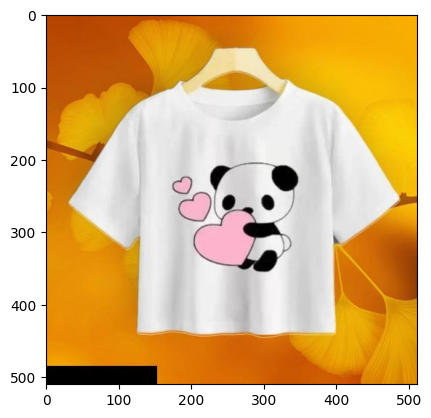

In [4]:
img = "/scratch/data/m23csa016/meesho_data/train_images/051419.jpg"

import matplotlib.pyplot as plt

img = plt.imread(img)
plt.imshow(img)

In [3]:
!export PATH="/iitjhome/m23csa016/.conda/envs/meesho/bin:$PATH"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
!python /iitjhome/m23csa016/meesho_code/cat_specific_attrs_fine/finetuning.py

Started training for cs_men_tshirts


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Finished training for cs_men_tshirts
All training jobs completed.
